<a href="https://colab.research.google.com/github/Vinuthna06reddy/VinuthnaReddy_INFO5731_FALL2024/blob/main/INFO5731_Exercise_4_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [2]:
!pip install gensim pandas matplotlib nltk
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Column names in the dataset: Index(['Review Title', 'Review Date', 'Review Content', 'User Rating'], dtype='object')
Coherence Score for 2 topics: 0.3119931607006967
Coherence Score for 3 topics: 0.35134064931491554
Coherence Score for 4 topics: 0.3488612369749901
Coherence Score for 5 topics: 0.32668061337317944
Coherence Score for 6 topics: 0.3110169034222504
Coherence Score for 7 topics: 0.3331815822054885
Coherence Score for 8 topics: 0.31988658526062946
Coherence Score for 9 topics: 0.3278671534513627
Coherence Score for 10 topics: 0.3116475856296578


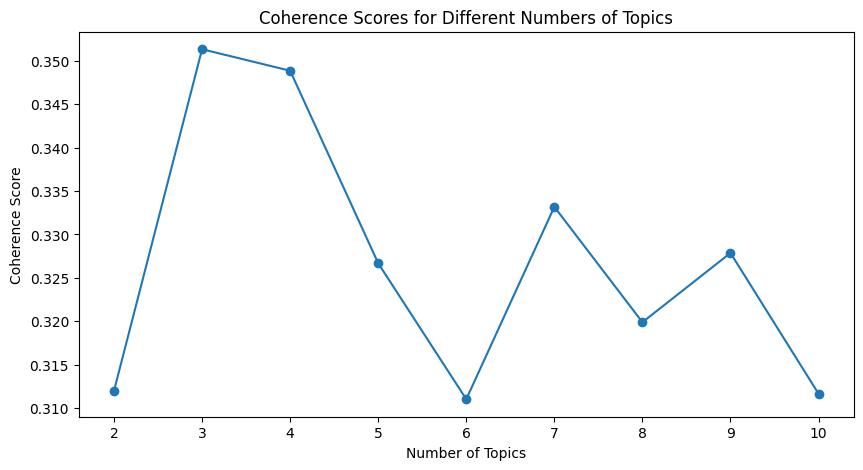


Optimal number of topics: 3

Top Keywords for Each Topic:
Topic 1: film, dune, part, villeneuve, paul, two, experience, cinematic, one, denis
Topic 2: movie, part, dune, like, one, film, really, time, first, see
Topic 3: film, part, movie, dune, one, first, story, paul, like, two


In [4]:
data = pd.read_csv('/dune_2_reviews.csv')  # Replace with your data file
print("Column names in the dataset:", data.columns)

# Specify the column name that contains text data
# Change this to the correct column name if 'text' is incorrect
text_column = 'Review Content'  # Change this if the column has a different name

# Check if the column exists
if text_column not in data.columns:
    # If 'text' column doesn't exist, try using the first column instead
    print(f"Column '{text_column}' not found. Using the first column instead.")
    text_column = data.columns[0]

# Extract documents
documents = data[text_column].values.tolist()

# Preprocessing function
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    processed_texts = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        processed_texts.append(tokens)
    return processed_texts

# Preprocess documents
processed_docs = preprocess_text(documents)

# Create Dictionary and Corpus
id2word = corpora.Dictionary(processed_docs)
corpus = [id2word.doc2bow(doc) for doc in processed_docs]

# Function to compute coherence values
def compute_coherence_values(corpus, dictionary, texts, k_range):
    coherence_values = []
    for k in k_range:
        lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42,
                                           update_every=1, passes=10, alpha='auto', per_word_topics=True)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        coherence_values.append(coherence_score)
        print(f'Coherence Score for {k} topics: {coherence_score}')
    return coherence_values

# Define range for K and calculate coherence values
topic_range = range(2, 11)
coherence_values = compute_coherence_values(corpus, id2word, processed_docs, topic_range)

# Plot coherence scores to select the best number of topics
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_values, marker='o')
plt.title('Coherence Scores for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_range)
plt.show()

# Find optimal number of topics
optimal_k = topic_range[coherence_values.index(max(coherence_values))]
print(f'\nOptimal number of topics: {optimal_k}')

# Train final LDA model with optimal number of topics
optimal_model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=optimal_k, random_state=42,
                                       update_every=1, passes=10, alpha='auto', per_word_topics=True)

# Display the topics and their keywords
print("\nTop Keywords for Each Topic:")
for i, topic in optimal_model.show_topics(formatted=False, num_words=10):
    keywords = ", ".join([word for word, prob in topic])
    print(f"Topic {i + 1}: {keywords}")

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [5]:
!pip install pandas scikit-learn gensim matplotlib nltk

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Coherence Score for 2 topics: 0.4310107075508447
Coherence Score for 3 topics: 0.4561136222711611
Coherence Score for 4 topics: 0.4522303002435396
Coherence Score for 5 topics: 0.45412015448351567
Coherence Score for 6 topics: 0.4617942005066224
Coherence Score for 7 topics: 0.45566672446335765
Coherence Score for 8 topics: 0.44805255342466666
Coherence Score for 9 topics: 0.4407772215789765
Coherence Score for 10 topics: 0.4549995606651656


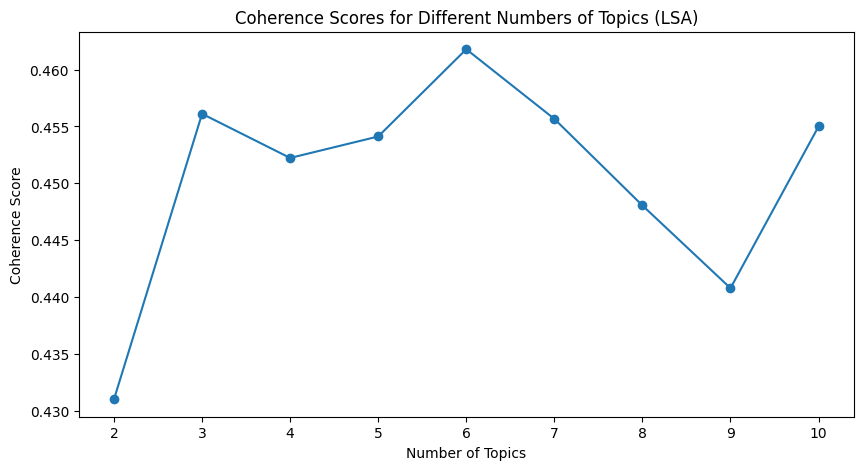


Optimal number of topics: 6

Top Keywords for Each Topic:
Topic 1: two, paul, story, like, first, one, dune, film, part, movie
Topic 2: one, time, think, watch, like, movies, great, really, good, movie
Topic 3: first, baron, much, character, jessica, emperor, book, fremen, chani, paul
Topic 4: see, truly, time, sound, ever, screen, cinema, films, best, film
Topic 5: read, much, first, second, story, one, book, dune, two, part
Topic 6: timothee, dune, zendaya, chalamet, best, butler, austin, two, one, part


In [6]:
data = pd.read_csv('/dune_2_reviews.csv')
text_column = 'Review Content'

def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    processed_texts = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        processed_texts.append(tokens)
    return processed_texts

documents = data[text_column].values.tolist()
processed_docs = preprocess_text(documents)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform([" ".join(doc) for doc in processed_docs])

dictionary = Dictionary(processed_docs)

def compute_coherence_values_lsa(X, k, texts, dictionary, feature_names):
    lsa_model = TruncatedSVD(n_components=k, random_state=42)
    lsa_model.fit(X)

    topics = []
    for comp in lsa_model.components_:
        topic_terms = [feature_names[i] for i in comp.argsort()[-10:]]
        topics.append(topic_terms)

    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

topic_range = range(2, 11)
coherence_values = []
feature_names = tfidf_vectorizer.get_feature_names_out()

for k in topic_range:
    coherence = compute_coherence_values_lsa(X, k, processed_docs, dictionary, feature_names)
    coherence_values.append(coherence)
    print(f"Coherence Score for {k} topics: {coherence}")

plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_values, marker='o')
plt.title('Coherence Scores for Different Numbers of Topics (LSA)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_range)
plt.show()

optimal_k = topic_range[coherence_values.index(max(coherence_values))]
print(f'\nOptimal number of topics: {optimal_k}')

optimal_model = TruncatedSVD(n_components=optimal_k, random_state=42)
optimal_model.fit(X)

print("\nTop Keywords for Each Topic:")
for i, comp in enumerate(optimal_model.components_):
    topic_keywords = [feature_names[idx] for idx in comp.argsort()[-10:]]
    print(f"Topic {i + 1}: {', '.join(topic_keywords)}")


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Coherence Score for 2 topics: 0.36862280342719417
Coherence Score for 3 topics: 0.36862280342719417
Coherence Score for 4 topics: 0.36862280342719417
Coherence Score for 5 topics: 0.36862280342719417
Coherence Score for 6 topics: 0.36862280342719417
Coherence Score for 7 topics: 0.36862280342719417
Coherence Score for 8 topics: 0.36862280342719417
Coherence Score for 9 topics: 0.36862280342719417
Coherence Score for 10 topics: 0.36862280342719417


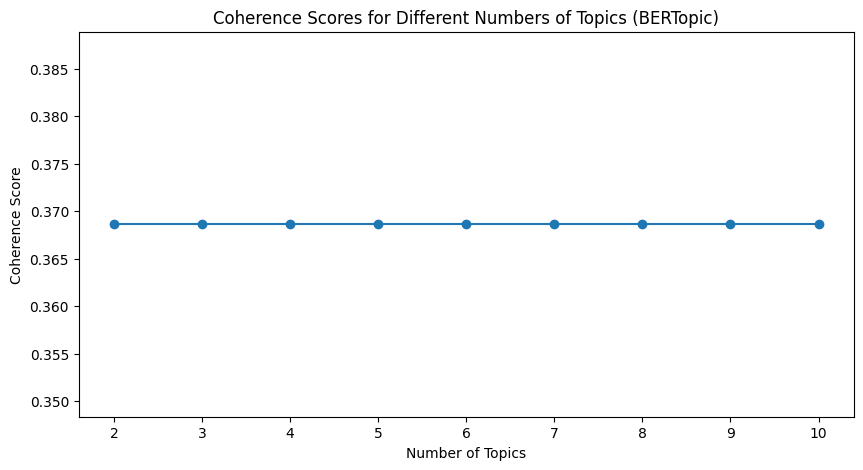


Optimal number of topics: 2

Summary of Topics:
Topic 0: movie, dune, part, film, one, first, paul, like, story, villeneuve


In [8]:
# Install necessary libraries
!pip install bertopic
!pip install nltk
!pip install pandas
!pip install gensim
!pip install umap-learn
!pip install scikit-learn

import pandas as pd
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Load your dataset
data = pd.read_csv('/dune_2_reviews.csv')  # Replace with your data file
text_column = 'Review Content'  # Adjust to match your column name

# Preprocess the text data
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    processed_texts = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        processed_texts.append(tokens)
    return processed_texts

documents = preprocess_text(data[text_column].values.tolist())

topic_model = BERTopic()
topic_model.fit([" ".join(doc) for doc in documents])

def compute_coherence_bertopic(model, texts):
    topics = model.get_topics()
    topic_words = [[word for word, _ in topics[topic]] for topic in topics if topic != -1]

    dictionary = Dictionary(texts)
    coherence_model = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Range of topics to evaluate
topic_range = range(2, 11)
coherence_values = []

for k in topic_range:
    reduced_model = topic_model.reduce_topics([" ".join(doc) for doc in documents], nr_topics=k)

    # Calculate coherence score
    coherence = compute_coherence_bertopic(reduced_model, [doc for doc in documents])  # Pass list of tokens
    coherence_values.append(coherence)
    print(f"Coherence Score for {k} topics: {coherence}")

plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics (BERTopic)")
plt.show()

optimal_k = topic_range[coherence_values.index(max(coherence_values))]
print(f"\nOptimal number of topics: {optimal_k}")

optimal_model = topic_model.reduce_topics([" ".join(doc) for doc in documents], nr_topics=optimal_k)

topics = optimal_model.get_topics()
print("\nSummary of Topics:")
for topic_num, words in topics.items():
    if topic_num != -1:
        topic_keywords = ", ".join([word for word, _ in words[:10]])
        print(f"Topic {topic_num}: {topic_keywords}")


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

I have chosen the alternative question and below are 3 visualizations for the topics generated for the LDA model. I have visualized following types of visualizations.
Word cloud, bar chart, Heat map

Word cloud - A word cloud represents most occured words (generally top 10) for a topic across documents considered. The font size of the word determines the high occurance of a word.



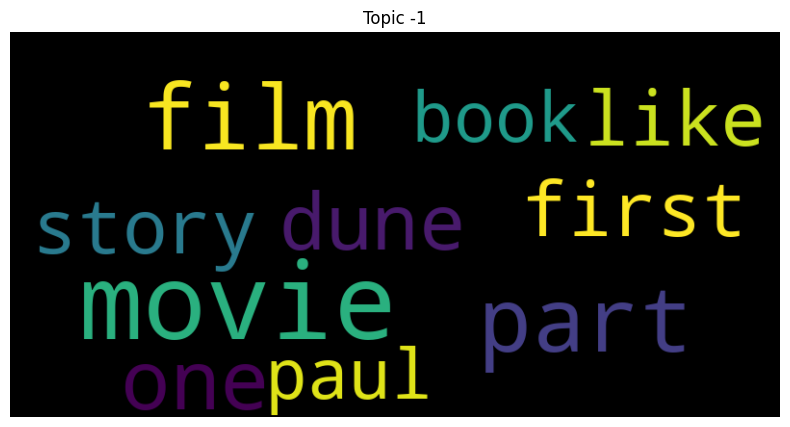

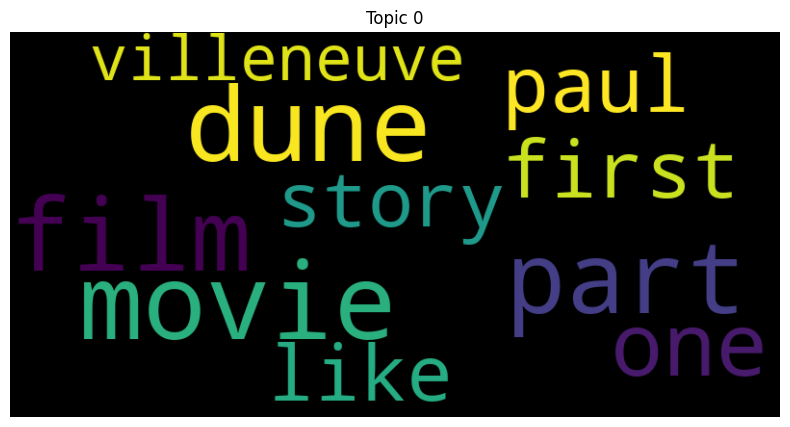

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

topics = topic_model.get_topics()
for topic_num, words in topics.items():
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.title(f'Topic {topic_num}')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


This visualization provides a quick overview of the essence of each topic and is particularly useful for presenting topics in an accessible and visually engaging way.

Bar chart - In this type of visualization, we are visualizing the average distribution of documents across differnet topics.


---



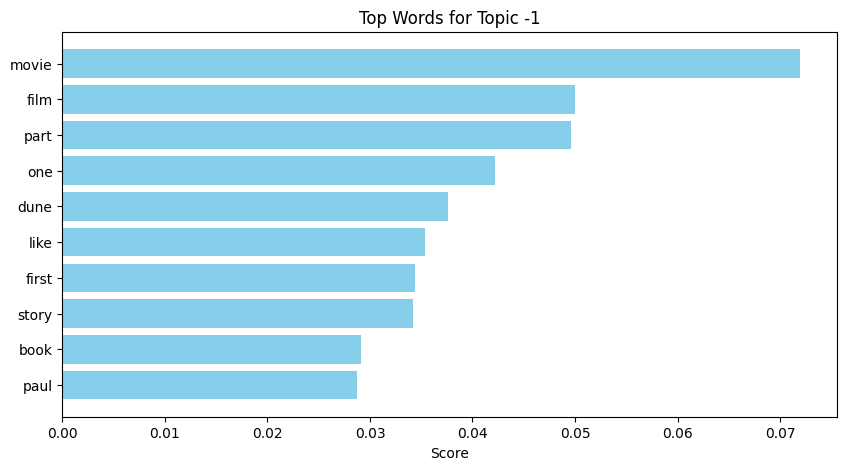

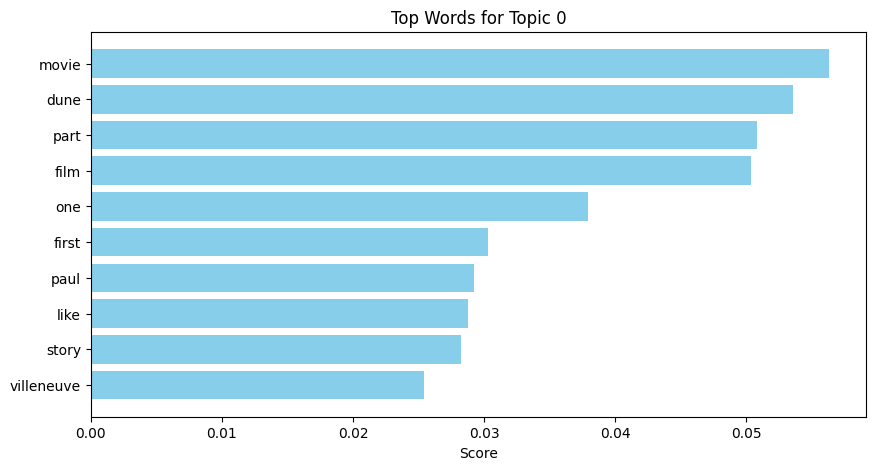

In [12]:
import matplotlib.pyplot as plt

topics = topic_model.get_topics()
for topic_num, words in topics.items():
    words, scores = zip(*words[:10])  # Top 10 words
    plt.figure(figsize=(10, 5))
    plt.barh(words, scores, color='skyblue')
    plt.xlabel("Score")
    plt.title(f"Top Words for Topic {topic_num}")
    plt.gca().invert_yaxis()
    plt.show()


In this chart, we can see the top N words for each topic and their corresponding scores, allowing you to analyze the most defining words within topics.

 Heatmap: It shows the distribution of topics across documents. Each row represents a document, and each column represents a topic. The heatmap intensity shows the proportion or likelihood of each topic within each document.

In [25]:
!pip install bertopic numpy seaborn scikit-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


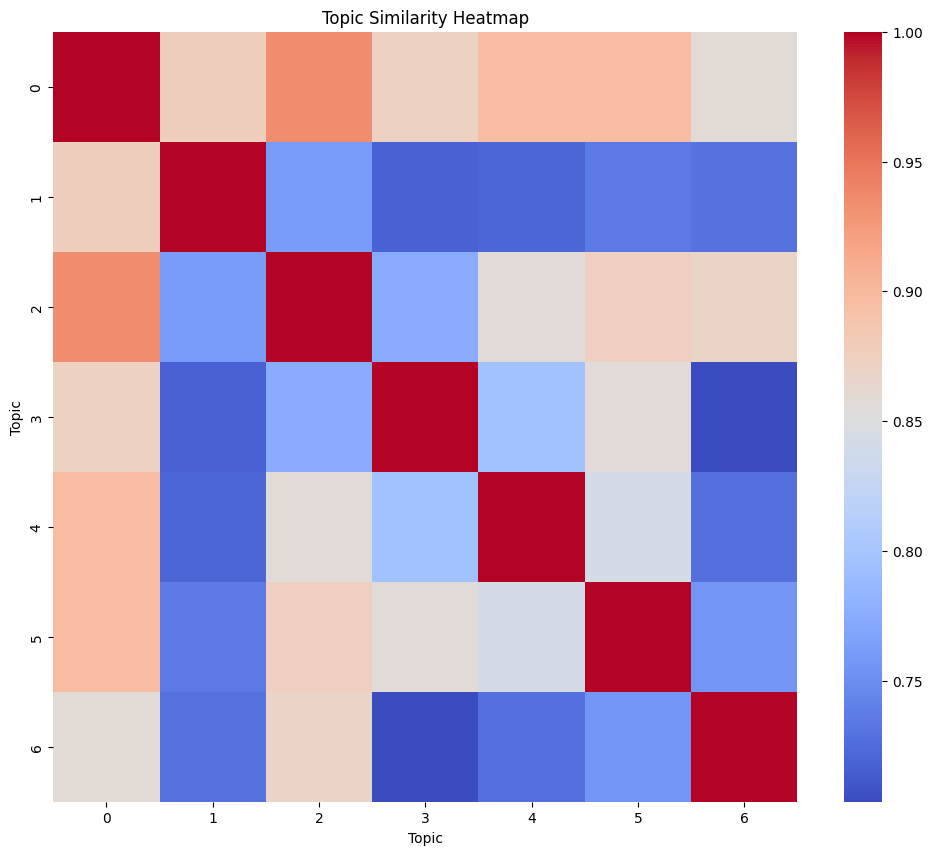

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

data = pd.read_csv('/content/dune_2_reviews.csv')
documents = data['Review Content'].astype(str).tolist()

stop_words = stopwords.words('english')
vectorizer_model = CountVectorizer(stop_words=stop_words)
topic_model = BERTopic(vectorizer_model=vectorizer_model)

topics, probabilities = topic_model.fit_transform(documents)

topic_embeddings = topic_model.topic_embeddings_

similarity_matrix = cosine_similarity(topic_embeddings)

plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=False)
plt.title("Topic Similarity Heatmap")
plt.xlabel("Topic")
plt.ylabel("Topic")
plt.show()


The Document-Topic Heatmap is valuable for identifying dominant and overlapping topics within individual documents, providing a detailed view of how topics are distributed across the entire dataset.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

To compare any topics in topic modelling these are few factors that needs to be considered in general. The below factors are chosen based my experience working on this exercise.

Coherence Score: This measure indicates topic interpretation and similarities in the semantic structure of most occurred words of a topic. A high coherence score implies that the topics are strongly
aligned with each other.
Topic Interpretation: This measure indicates if the topics generated by each topic modelling are coherent and easily interpretable. Can these topic models accurately suumarize based on the
best words associated with each topic.
Scalable: This measure indicates if the topic models can handle datasets effectively and efficiently.

From the above mentioned measures, when we consider coherence score and topic interpretability, BerTopic is more efficient than the other two topic models (namely LDA and LSA). But when
considering scalability BerTopic appears to be less efficient than LDA and LSA models as it has taken significant amount of time when compared to the other two models to run the same
dataset.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Learning Experience: During this exercise, I have learned what are the various steps involved in implementation of LDA, LSA, and BerTopic for topic modeling. Prior to implementation of these
algorithms I had to understand what are various preprocessing steps that are required to run on this data. For example, following are few steps I used for preprocessing the data: Removing
emails, next line charaters, stop words, biagram, triagrams, lemmentization and stemming. I have also learned about the importance of coherence score which can help understand the optimal
number of topics required for a dataset. I have also visualized the optimal topics chosen using LDA model which helped me understand more about these topics and topic modelling in general.

Challenges Encountered: While working on this exercise, I could not implement the lda2vec model even though I have referred to various sources on google.



'''